In [ ]:
#https://yassin01.medium.com/can-benfords-law-be-used-to-detect-gan-generated-images-from-introduction-to-implementation-b5b32faf4b91

In [2]:
import kagglehub

path = kagglehub.dataset_download("xhlulu/140k-real-and-fake-faces")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 3.75G/3.75G [05:14<00:00, 12.8MB/s]

Extracting files...


Path to dataset files: C:\Users\Utilisateur\.cache\kagglehub\datasets\xhlulu\140k-real-and-fake-faces\versions\2


In [ ]:
C:\Users\Utilisateur\.cache\kagglehub\datasets\xhlulu\140k-real-and-fake-faces\versions\2\real_vs_fake\real-vs-fake\test\real

In [1]:
import pandas as pd

df_test = pd.read_csv(r"C:\Users\Utilisateur\.cache\kagglehub\datasets\xhlulu\140k-real-and-fake-faces\versions\2\test.csv")
df_test


,Unnamed: 0,original_path,id,label,label_str,path
0,0,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,18233,1,real,test/real/18233.jpg
1,1,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,54317,1,real,test/real/54317.jpg
2,2,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,40155,1,real,test/real/40155.jpg
3,3,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,12875,1,real,test/real/12875.jpg
4,4,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,52543,1,real,test/real/52543.jpg
...,...,...,...,...,...,...
19995,9995,/kaggle/input/1-million-fake-faces/1m_faces_12...,G4185199D1,0,fake,test/fake/G4185199D1.jpg
19996,9996,/kaggle/input/1-million-fake-faces/1m_faces_08...,AV7F0USBRY,0,fake,test/fake/AV7F0USBRY.jpg
19997,9997,/kaggle/input/1-million-fake-faces/1m_faces_08...,VP849XISYO,0,fake,test/fake/VP849XISYO.jpg
19998,9998,/kaggle/input/1-million-fake-faces/1m_faces_00...,3986S7FE8O,0,fake,test/fake/3986S7FE8O.jpg


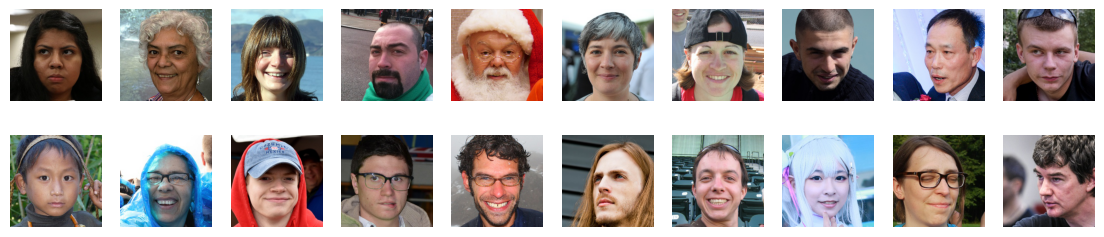

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

nrows, ncols = 2, 10 
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 3))
for i in range(0, nrows * ncols):
    image = Image.open(f"C:/Users/Utilisateur/.cache/kagglehub/datasets/xhlulu/140k-real-and-fake-faces/versions/2/real_vs_fake/real-vs-fake/{df_test['path'][i]}")
    axes[i//ncols, i%ncols].imshow(image,cmap='grey')
    axes[i//ncols, i%ncols].axis('off')
plt.show()

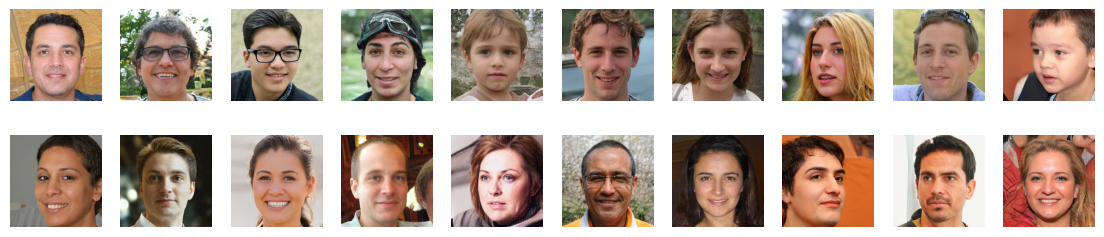

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

nrows, ncols = 2, 10 
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 3))
for i in range(0, nrows * ncols):
    image = Image.open(f"C:/Users/Utilisateur/.cache/kagglehub/datasets/xhlulu/140k-real-and-fake-faces/versions/2/real_vs_fake/real-vs-fake/{df_test['path'][19999-i]}")
    axes[i//ncols, i%ncols].imshow(image,cmap='grey')
    axes[i//ncols, i%ncols].axis('off')
plt.show()

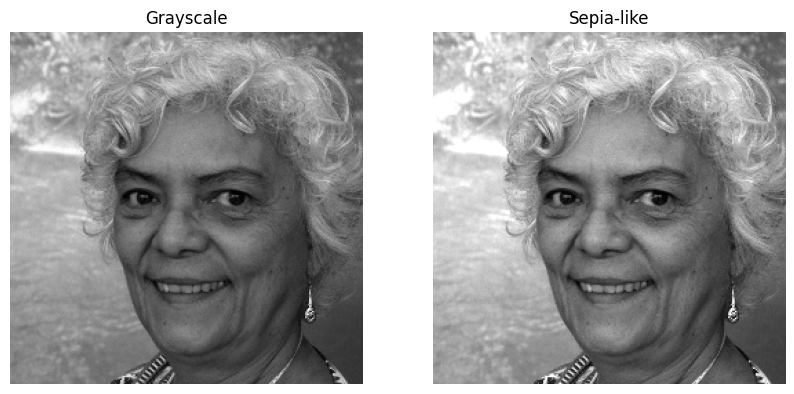

In [4]:
test= Image.open(f"C:/Users/Utilisateur/.cache/kagglehub/datasets/xhlulu/140k-real-and-fake-faces/versions/2/real_vs_fake/real-vs-fake/{df_test['path'][1]}").convert("L")
test_sepia = test.copy()
sepia_data = np.array(test_sepia)
sepia_data = np.array([[min(255, int(pixel * 1.2)) for pixel in row] for row in sepia_data])
test_sepia = Image.fromarray(sepia_data.astype('uint8'))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(test, cmap='gray')
ax1.set_title('Grayscale')
ax1.axis('off')
ax2.imshow(test_sepia, cmap='gray')
ax2.set_title('Sepia-like')
ax2.axis('off')
plt.show()

Le DCT (Transformée en Cosinus Discrète) est une méthode mathématique qui transforme une image (ou un signal) pour passer du domaine spatial au domaine fréquentiel.

En termes simples, cela signifie que, au lieu de regarder une image pixel par pixel, on regarde ses fréquences (combien de fois certains motifs se répètent dans l'image).

Comment ça marche ?
Chaque pixel d'une image peut être vu comme une valeur dans un espace de données.
Le DCT décompose cette image en une série de fréquences : certaines parties de l'image auront des motifs très répétitifs (fréquences basses), tandis que d'autres auront des détails fins (fréquences élevées).
Une fois l'image transformée, il devient plus facile de la manipuler ou de la compresser. Par exemple, on peut supprimer les fréquences élevées (les détails fins) si on veut réduire la taille de l'image tout en gardant l'essentiel de son apparence.

![title](hqdefault.jpg)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct
from PIL import Image
import math


def first_digit(number):
    #abs pour que ce soit positif, str pour qu'on puisse récupérer le premier élément avec [0] et enfin return int parce qu'on veut un chiffre
    return int(str(abs(number))[0])

def dct(image_path):
    #on charge l'image et on la convertis en gris
    image = Image.open(image_path).convert("L")  # "L" pour l'image en niveaux de gris
    image = np.array(image)
    
    # Étape 2: Appliquer la DCT (Discrète Cosine Transform) 2D
    dct_image = dct(dct(image.T, norm='ortho').T)
    
    # Étape 3: Extraire les premières décimales des coefficients DCT
    digits = [first_digit(coef) for coef in dct_image.flatten() if coef != 0]
    # print(digits)
    # Étape 4: Calculer la fréquence de chaque première décimale
    digit_counts = {i: digits.count(i) for i in range(1, 10)}
    
    # Convertir en pourcentage
    total_digits = len(digits)
    digit_percentages = {k: (v / total_digits) * 100 for k, v in digit_counts.items()}
    
    # Retourner les pourcentages des premières décimales
    return digit_percentages

# Fonction pour afficher la Loi de Benford pour comparaison
def benford_law():
    # Loi de Benford théorique (approximative)
    benford_percentages = {
        1: 30.1,
        2: 17.6,
        3: 12.5,
        4: 9.7,
        5: 7.9,
        6: 6.7,
        7: 5.8,
        8: 5.1,
        9: 4.6
    }
    return benford_percentages

image_dct_percentages = dct(f"C:/Users/Utilisateur/.cache/kagglehub/datasets/xhlulu/140k-real-and-fake-faces/versions/2/real_vs_fake/real-vs-fake/{df_test['path'][1]}")

# Afficher les résultats
print("Première décimale de l'image (DCT):")
print(image_dct_percentages)

# Afficher la comparaison avec la Loi de Benford
print("\nLoi de Benford:")
benford = benford_law()
for digit in range(1, 10):
    print(f"Digit {digit}: Image = {image_dct_percentages.get(digit, 0):.2f}% | Benford = {benford[digit]:.2f}%")
    
# Optionnel : Affichage des résultats sous forme de graphique
plt.bar(image_dct_percentages.keys(), image_dct_percentages.values(), alpha=0.6, label="DCT Image")
plt.plot(list(benford.keys()), list(benford.values()), color='red', label="Benford Law", linestyle='--')
plt.xlabel('Premier chiffre')
plt.ylabel('Pourcentage')
plt.legend()
plt.title("Comparaison de la Loi de Benford et des Premiers Chiffres DCT de l'Image")
plt.show()


TypeError: dct() got an unexpected keyword argument 'norm'

65536
Première décimale de l'image (DCT):
{1: 28.86505126953125, 2: 13.39569091796875, 3: 10.089111328125, 4: 8.63189697265625, 5: 7.666015625, 6: 6.65130615234375, 7: 5.853271484375, 8: 5.3009033203125, 9: 4.327392578125}
Différence calculcé : 0.27260742187499964


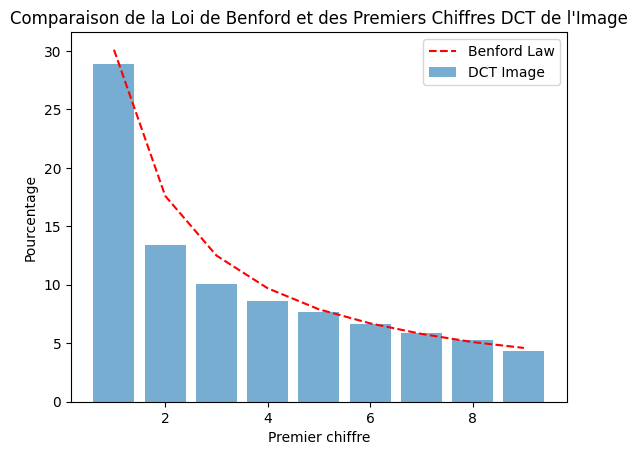

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct
from PIL import Image
import math

#abs pour que ce soit positif, str pour qu'on puisse récupérer le premier élément avec [0] et enfin return int parce qu'on veut un chiffre
def first_digit(number):
    return int(str(abs(number))[0])

"""
    Extrait le premier chiffre significatif d'un nombre.
    
    Args:
        number (float): Nombre dont on veut extraire le premier chiffre
        
    Returns:
        int: Premier chiffre du nombre (entre 1 et 9)
        
    Note:
        Utilise la valeur absolue pour gérer les nombres négatifs
    """
def dct_and_benford(image_path):
    """
    Applique la transformée en cosinus discrète (DCT) à une image et analyse la distribution 
    des premiers chiffres selon la loi de Benford.
    
    Args:
        image_path (str): Chemin vers l'image à analyser
        
    Returns:
        dict: Dictionnaire contenant les pourcentages d'apparition de chaque premier chiffre (1-9)
        
    Note:
        Convertit l'image en niveaux de gris avant l'analyse
    """
    image = Image.open(image_path).convert("L")  # "L" pour l'image en niveaux de gris
    image = np.array(image)

    #l'image étant en deux dimension, on doit donc utiliser le DCT deux fois, on transpose, on dct à la verticale puis on retranspose pour faire la deuxième DCT en aillant le format inital
    #https://stackoverflow.com/questions/15978468/using-the-scipy-dct-function-to-create-a-2d-dct-ii
    dct_image = dct(dct(image.T, norm='ortho').T, norm='ortho')
    
    #on utilise la fonction précédente pour récupérer la première décimal de chaque chiffre venant du flaten de dct_image (on utilise flatten pour applatir l'image en une seule dimension)
    digits = [first_digit(coef) for coef in dct_image.flatten() if coef != 0]
    # print(digits)
    
    # on créer le dictionnaire pour avoir le total de chaque décimal
    digit_counts = {i: digits.count(i) for i in range(1, 10)}
    
    #on va convertir en pourcentage
    total_digits = len(digits)
    print(total_digits)
    digit_percentages = {k: (v / total_digits) * 100 for k, v in digit_counts.items()}

    return digit_percentages

#Loi de Benford
# def benford_law():
benford_percentages = {
    1: 30.1,
    2: 17.6,
    3: 12.5,
    4: 9.7,
    5: 7.9,
    6: 6.7,
    7: 5.8,
    8: 5.1,
    9: 4.6
}
    # return benford_percentages

image_dct_percentages = dct_and_benford(f"C:/Users/Utilisateur/.cache/kagglehub/datasets/xhlulu/140k-real-and-fake-faces/versions/2/real_vs_fake/real-vs-fake/{df_test['path'][1]}")

# Afficher les résultats
print("Première décimale de l'image (DCT):")
print(image_dct_percentages)

diff_perc=0
for i in range(1,10):
    diff_perc=abs(image_dct_percentages[i]-benford_percentages[i])
print("Différence calculcé :",diff_perc)

plt.bar(image_dct_percentages.keys(), image_dct_percentages.values(), alpha=0.6, label="DCT Image")
plt.plot(list(benford_percentages.keys()), list(benford_percentages.values()), color='red', label="Benford Law", linestyle='--')
plt.xlabel('Premier chiffre')
plt.ylabel('Pourcentage')
plt.legend()
plt.title("Comparaison de la Loi de Benford et des Premiers Chiffres DCT de l'Image")
plt.show()


212500
Première décimale de l'image (DCT):
{1: 51.05222706145006, 2: 19.18286181361247, 3: 9.928143566470252, 4: 6.120606570776758, 5: 4.394344203296368, 6: 3.186570532762386, 7: 2.5229050006709857, 8: 2.0349156388390734, 9: 1.5774256121216559}
Différence calculcé : 3.0225743878783438


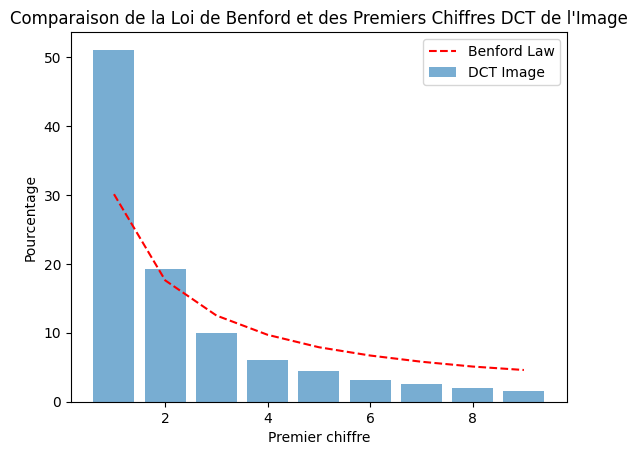

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct
from PIL import Image
import math

#abs pour que ce soit positif, str pour qu'on puisse récupérer le premier élément avec [0] et enfin return int parce qu'on veut un chiffre
def first_digit(number):
    """
    Extrait le premier chiffre significatif d'un nombre.
    
    Args:
        number (float): Nombre dont on veut extraire le premier chiffre
        
    Returns:
        int: Premier chiffre du nombre (entre 1 et 9)
        
    Note:
        Utilise la valeur absolue pour gérer les nombres négatifs
    """
    return int(str(abs(number))[0])

# Fonction pour appliquer la DCT à une image et récupérer les premières décimales des coefficients
def dct_and_benford(image_path):
    """
    Applique la transformée en cosinus discrète (DCT) à une image et analyse la distribution 
    des premiers chiffres selon la loi de Benford.
    
    Args:
        image_path (str): Chemin vers l'image à analyser
        
    Returns:
        dict: Dictionnaire contenant les pourcentages d'apparition de chaque premier chiffre (1-9)
        
    Note:
        Convertit l'image en niveaux de gris avant l'analyse
    """
    image = Image.open(image_path).convert("L")  # "L" pour l'image en niveaux de gris
    image = np.array(image)

    #l'image étant en deux dimension, on doit donc utiliser le DCT deux fois, on transpose, on dct à la verticale puis on retranspose pour faire la deuxième DCT en aillant le format inital
    #https://stackoverflow.com/questions/15978468/using-the-scipy-dct-function-to-create-a-2d-dct-ii
    dct_image = dct(dct(image.T, norm='ortho').T, norm='ortho')
    
    #on utilise la fonction précédente pour récupérer la première décimal de chaque chiffre venant du flaten de dct_image (on utilise flatten pour applatir l'image en une seule dimension)
    digits = [first_digit(coef) for coef in dct_image.flatten() if coef != 0]
    # print(digits)
    
    # on créer le dictionnaire pour avoir le total de chaque décimal
    digit_counts = {i: digits.count(i) for i in range(1, 10)}
    
    #on va convertir en pourcentage
    total_digits = len(digits)
    print(total_digits)
    
    # Calculer les pourcentages et s'assurer que la somme fait 100%
    raw_percentages = {k: (v / total_digits) * 100 for k, v in digit_counts.items()}
    total_percentage = sum(raw_percentages.values())
    digit_percentages = {k: (v / total_percentage) * 100 for k, v in raw_percentages.items()}

    return digit_percentages


benford_percentages = {
    1: 30.1,
    2: 17.6,
    3: 12.5,
    4: 9.7,
    5: 7.9,
    6: 6.7,
    7: 5.8,
    8: 5.1,
    9: 4.6
}


image_dct_percentages = dct_and_benford(r"C:\Users\Utilisateur\Documents\jupyter\projet\projet1\photoshop-fails3-1.jpg")

# Afficher les résultats
print("Première décimale de l'image (DCT):")
print(image_dct_percentages)

diff_perc=0
for i in range(1,10):
    diff_perc=abs(image_dct_percentages[i]-benford_percentages[i])
print("Différence calculcé :",diff_perc)
plt.bar(image_dct_percentages.keys(), image_dct_percentages.values(), alpha=0.6, label="DCT Image")
plt.plot(list(benford_percentages.keys()), list(benford_percentages.values()), color='red', label="Benford Law", linestyle='--')
plt.xlabel('Premier chiffre')
plt.ylabel('Pourcentage')
plt.legend()
plt.title("Comparaison de la Loi de Benford et des Premiers Chiffres DCT de l'Image")
plt.show()


In [7]:
for i in range(0):
    image = Image.open(f"C:/Users/Utilisateur/.cache/kagglehub/datasets/xhlulu/140k-real-and-fake-faces/versions/2/real_vs_fake/real-vs-fake/{df_test['path'][i]}")

In [8]:
from tqdm import tqdm
# Initialiser une colonne vide
df_test['digit_percentage'] = None

#abs pour que ce soit positif, str pour qu'on puisse récupérer le premier élément avec [0] et enfin return int parce qu'on veut un chiffre
def first_digit(number):
    return int(str(abs(number))[0])

# Fonction pour appliquer la DCT à une image et récupérer les premières décimales des coefficients
def dct_and_benford(image_path):
    #on charge l'image et on la convertis en gris
    image = Image.open(image_path).convert("L")  # "L" pour l'image en niveaux de gris
    image = np.array(image)

    #l'image étant en deux dimension, on doit donc utiliser le DCT deux fois, on transpose, on dct à la verticale puis on retranspose pour faire la deuxième DCT en aillant le format inital
    #https://stackoverflow.com/questions/15978468/using-the-scipy-dct-function-to-create-a-2d-dct-ii
    dct_image = dct(dct(image.T, norm='ortho').T, norm='ortho')
    
    #on utilise la fonction précédente pour récupérer la première décimal de chaque chiffre venant du flaten de dct_image (on utilise flatten pour applatir l'image en une seule dimension)
    digits = [first_digit(coef) for coef in dct_image.flatten() if coef != 0]
    # print(digits)
    
    # on créer le dictionnaire pour avoir le total de chaque décimal
    digit_counts = {i: digits.count(i) for i in range(1, 10)}
    
    #on va convertir en pourcentage
    total_digits = len(digits)
    # print(total_digits)
    digit_percentages = {k: (v / total_digits) * 100 for k, v in digit_counts.items()}

    return digit_percentages

benford_percentages = {
    1: 30.1,
    2: 17.6,
    3: 12.5,
    4: 9.7,
    5: 7.9,
    6: 6.7,
    7: 5.8,
    8: 5.1,
    9: 4.6
}

# Utiliser tqdm pour montrer la progression
for w in tqdm(df_test.index, desc="Processing Images"):
    diff=0
    # image_path = df_test.loc[w, 'path']
    image_dct_percentages = dct_and_benford(f"C:/Users/Utilisateur/.cache/kagglehub/datasets/xhlulu/140k-real-and-fake-faces/versions/2/real_vs_fake/real-vs-fake/{df_test['path'][w]}")
    for i in range(1,10):
        diff_perc=abs(image_dct_percentages[i]-benford_percentages[i])
        df_test.at[w, 'digit_percentage'] = diff_perc

Processing Images:   0%|          | 0/20000 [00:00<?, ?it/s]

Processing Images: 100%|██████████| 20000/20000 [31:33<00:00, 10.56it/s] 


In [9]:
df_test.drop("diff_percentage",axis=1,inplace=True)
df_test.to_csv("benford.csv")
df_test

KeyError: "['diff_percentage'] not found in axis"

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df_test[['digit_percentage']]
y = df_test['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 52.83%
